In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
upload=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [4]:
air=pd.read_excel('Airlines+Data.xlsx')

In [5]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [7]:
air2=air.copy()

In [8]:
air2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [9]:
air2['Month']=pd.to_datetime(air2.Month,format='%b-%y')
air2['month']=air2.Month.dt.strftime("%b")
air2['year']=air2.Month.dt.strftime("%Y")
#air['day']=air.Month.dt.strftime("%d")
#air['wkday']=air.Month.dt.strftime("%A")

<Axes: xlabel='month', ylabel='year'>

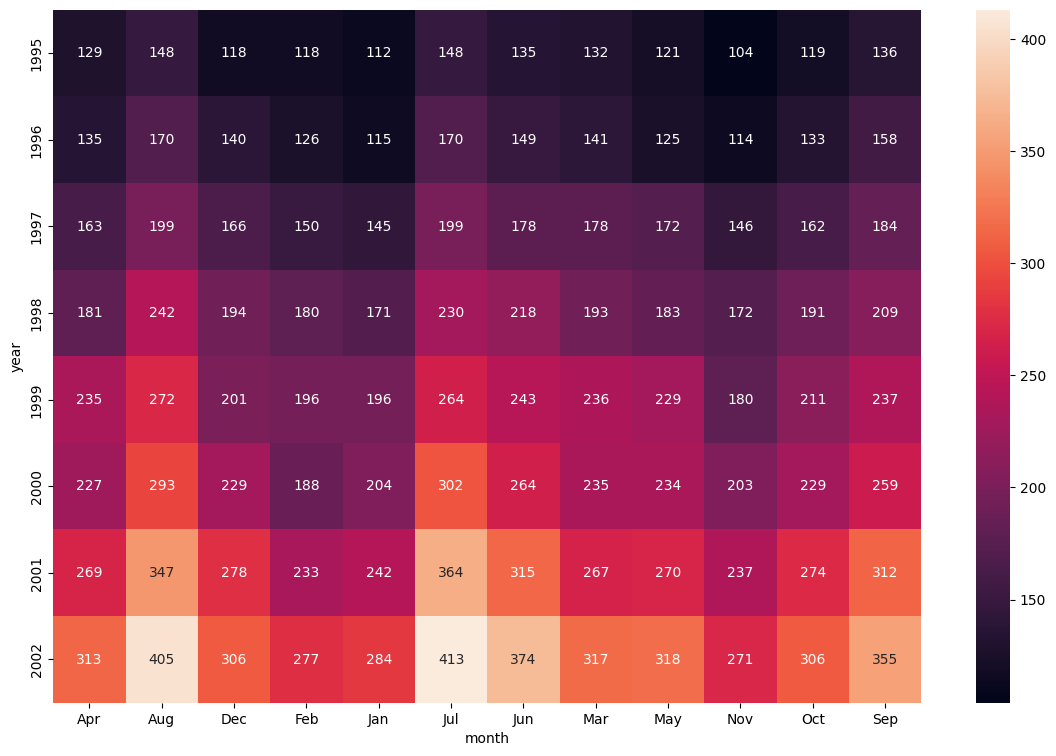

In [10]:
plt.figure(figsize=(14,9))
heatmap_y=pd.pivot_table(data=air2,values="Passengers",index="year",columns="month",aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y,annot=True,fmt='g')

<Axes: xlabel='year', ylabel='Passengers'>

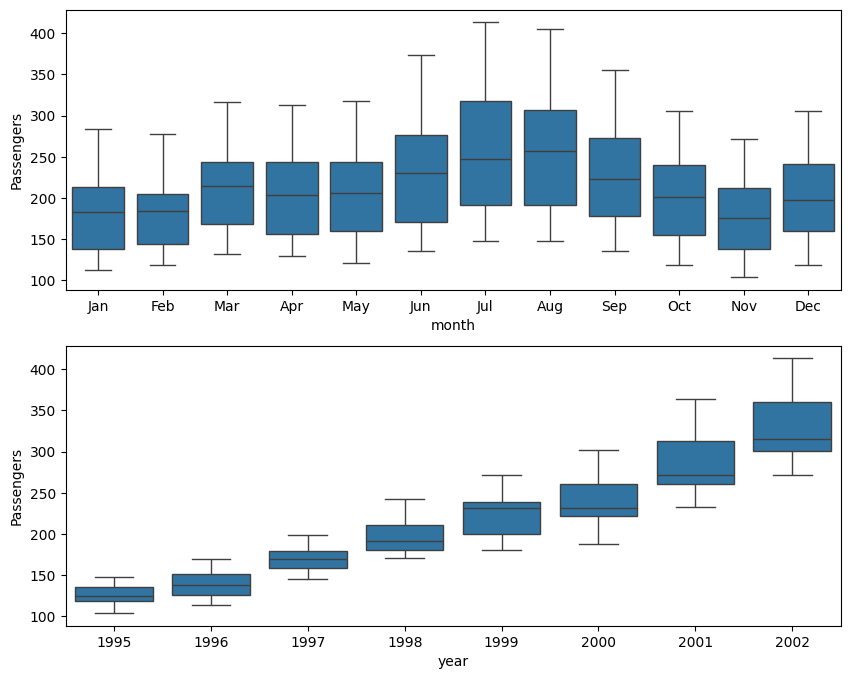

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=air2)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=air2)

<Axes: xlabel='month', ylabel='Passengers'>

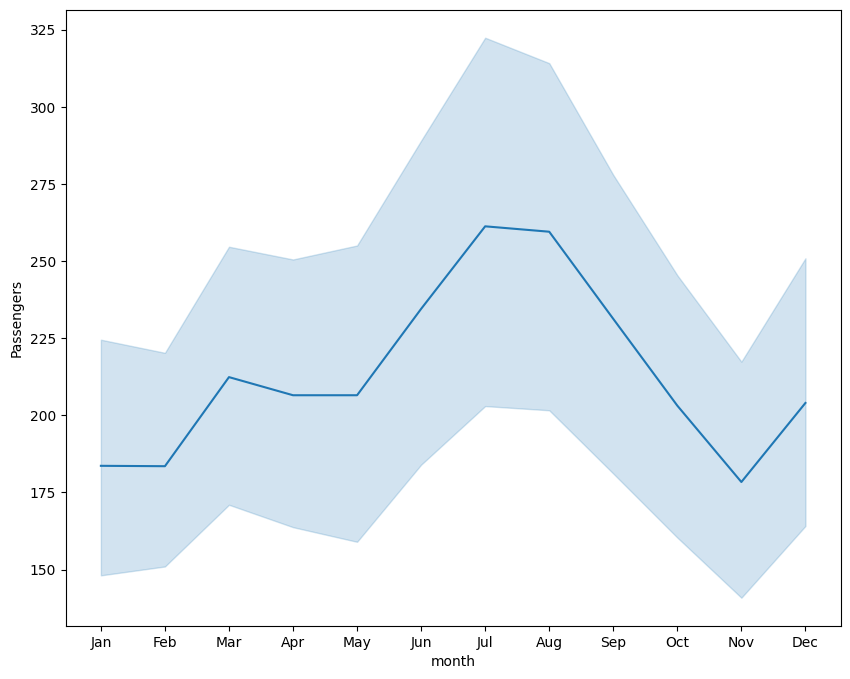

In [12]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month',y='Passengers',data=air2)

In [13]:
air.shape

(96, 2)

In [14]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


Linear Model

In [15]:
df2=air.copy()

In [16]:
df2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [17]:
df2['Month']=pd.to_datetime(df2.Month,format='%b-%y')
df2['month']=air2.Month.dt.strftime("%b")

In [18]:
df2

,Month,Passengers,month
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov


In [19]:
df2 = pd.get_dummies(df2, columns = ['month'])

In [20]:
df2

,Month,Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,False,False,False,False,False,False,False,False,False,True,False,False


In [21]:
df2 = df2.drop(columns=['Month'])

In [22]:
df2

,Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,112,False,False,False,False,True,False,False,False,False,False,False,False
1,118,False,False,False,True,False,False,False,False,False,False,False,False
2,132,False,False,False,False,False,False,False,True,False,False,False,False
3,129,True,False,False,False,False,False,False,False,False,False,False,False
4,121,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,False,True,False,False,False,False,False,False,False,False,False,False
92,355,False,False,False,False,False,False,False,False,False,False,False,True
93,306,False,False,False,False,False,False,False,False,False,False,True,False
94,271,False,False,False,False,False,False,False,False,False,True,False,False


In [23]:
df2.columns.value_counts()

Passengers    1
month_Apr     1
month_Aug     1
month_Dec     1
month_Feb     1
month_Jan     1
month_Jul     1
month_Jun     1
month_Mar     1
month_May     1
month_Nov     1
month_Oct     1
month_Sep     1
Name: count, dtype: int64

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [25]:
df2['month_Apr']= label_encoder.fit_transform(df2['month_Apr'])
df2['month_Aug']= label_encoder.fit_transform(df2['month_Aug'])
df2['month_Dec']= label_encoder.fit_transform(df2['month_Dec'])
df2['month_Feb']= label_encoder.fit_transform(df2['month_Feb'])
df2['month_Jan']= label_encoder.fit_transform(df2['month_Jan'])
df2['month_Jul']= label_encoder.fit_transform(df2['month_Jul'])
df2['month_Jun']= label_encoder.fit_transform(df2['month_Jun'])
df2['month_Mar']= label_encoder.fit_transform(df2['month_Mar'])
df2['month_May']= label_encoder.fit_transform(df2['month_May'])
df2['month_Nov']= label_encoder.fit_transform(df2['month_Nov'])
df2['month_Oct']= label_encoder.fit_transform(df2['month_Oct'])
df2['month_Sep']= label_encoder.fit_transform(df2['month_Sep'])

In [26]:
df2.columns

Index(['Passengers', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [27]:
df2=df2.reindex(columns=['Passengers', 'month_Jan', 'month_Feb', 'month_Mar', 'month_Apr',
       'month_May', 'month_Jun', 'month_Jul', 'month_Aug', 'month_Sep',
       'month_Oct', 'month_Nov', 'month_Dec'])

In [28]:
df2

,Passengers,month_Jan,month_Feb,month_Mar,month_Apr,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec
0,112,1,0,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,1,0,0,0,0
92,355,0,0,0,0,0,0,0,0,1,0,0,0
93,306,0,0,0,0,0,0,0,0,0,1,0,0
94,271,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
t= np.arange(1,97)

In [30]:
df2['t'] = t

In [31]:
df2['t_sq'] = df2['t']*df2['t']

In [32]:
log_Passengers=np.log(df2['Passengers'])

In [33]:
df2['log_Passengers']=log_Passengers

In [34]:
df2

,Passengers,month_Jan,month_Feb,month_Mar,month_Apr,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,5.602119


In [35]:
df2['month_Jul']= label_encoder.fit_transform(df2['month_Jul'])

In [36]:
df2

,Passengers,month_Jan,month_Feb,month_Mar,month_Apr,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,5.602119


In [37]:
Train=df2.head(76)
Test=df2.tail(20)

In [38]:
import statsmodels.formula.api as smf
linear_model= smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))

rmse_linear

57.000147882565884

In [39]:
Exp= smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Exp))**2))

rmse_Exp

314.4271317504474

In [40]:
Quad= smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad=pd.Series(Quad.predict(pd.DataFrame(Test[['t','t_sq']])))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))

rmse_Quad

58.494274639475286

In [41]:
additive= smf.ols('Passengers~ month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']])))
rmseadd=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predadd))**2))
rmseadd

132.25413439949475

In [42]:
mulsea=smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=Train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']])))
rmsemul= np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

137.61090856256476

In [43]:
output = {"Model": pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmseadd','rmsemul']),
          'Values':pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmseadd,rmsemul])}

In [44]:
rmse=pd.DataFrame(output)


In [45]:
print(rmse)

         Model      Values
0  rmse_linear   57.000148
1     rmse_Exp  314.427132
2    rmse_Quad   58.494275
3      rmseadd  132.254134
4      rmsemul  137.610909
